In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
data=pd.read_csv("D:\Analysis/Education.csv")
data.head()

,state_name,is_state,year,gender,education,convicts,under_trial,detenues,others
0,A & N Islands,0,2001,Female,Below Class X,0,0,0,0
1,A & N Islands,0,2001,Female,Class X and above but below graduate,2,1,0,0
2,A & N Islands,0,2001,Female,Graduate,0,0,0,0
3,A & N Islands,0,2001,Female,Holding technical degree/diploma etc,0,0,0,0
4,A & N Islands,0,2001,Female,Illiterate,0,0,0,0


In [7]:
data['sortedothers']=data.groupby(['year','education','gender'])['others'].transform('sum')
data['sortedconvicts']=data.groupby(['year','education','gender'])['convicts'].transform('sum')
data['sortedunder_trial']=data.groupby(['year','education','gender'])['under_trial'].transform('sum')
data['sorteddetenues']=data.groupby(['year','education','gender'])['detenues'].transform('sum')
newdata = data[['year','education','gender','sortedconvicts','sortedunder_trial','sorteddetenues','sortedothers']]
newdata = newdata.drop_duplicates(subset=['year','education','gender'],keep="last")
newdata.head()

,year,education,gender,sortedconvicts,sortedunder_trial,sorteddetenues,sortedothers
5190,2001,Below Class X,Female,716,2349,50,348
5191,2001,Class X and above but below graduate,Female,172,646,66,71
5192,2001,Graduate,Female,33,202,1,5
5193,2001,Holding technical degree/diploma etc,Female,19,55,1,0
5194,2001,Illiterate,Female,1227,3871,153,1027


In [8]:
newdata['prisoners'] = newdata['sortedconvicts']+newdata['sortedunder_trial']+newdata['sorteddetenues']+newdata['sortedothers']
allprisoner = newdata[['year','education','gender','prisoners']]
allprisoner.head()

,year,education,gender,prisoners
5190,2001,Below Class X,Female,3463
5191,2001,Class X and above but below graduate,Female,955
5192,2001,Graduate,Female,241
5193,2001,Holding technical degree/diploma etc,Female,75
5194,2001,Illiterate,Female,6278


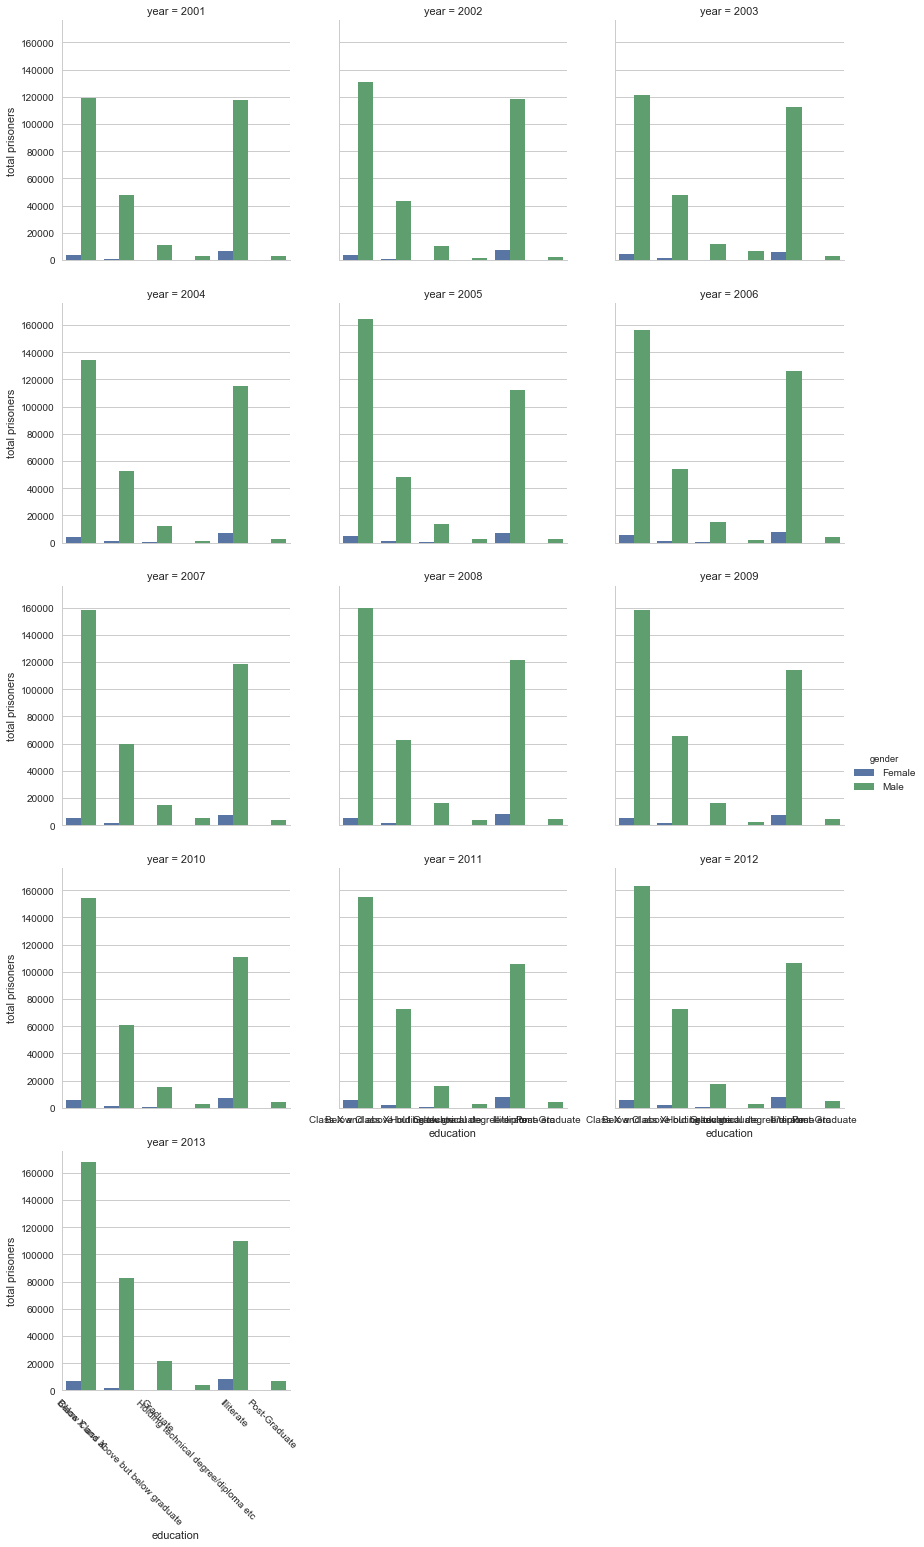

In [17]:
sns.set(style="whitegrid", color_codes=True)
graph = sns.factorplot(x='education',y='prisoners',hue='gender',col='year',data=allprisoner,kind='bar',col_wrap=3)
plt.xticks(rotation=-45)
graph.set_axis_labels("education","total prisoners")
graph.despine()
plt.show()

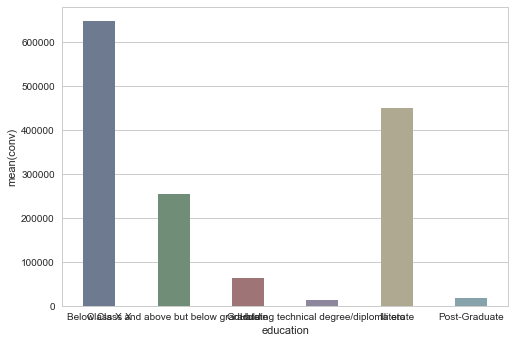

In [21]:
fig, ax = plt.subplots()
sns.set(style="whitegrid", color_codes=True)
data['conv']=data.groupby('education')['convicts'].transform('sum')
sns.barplot(x='education',y='conv',ax=ax, data=data,saturation=0.35)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .43)
plt.show()

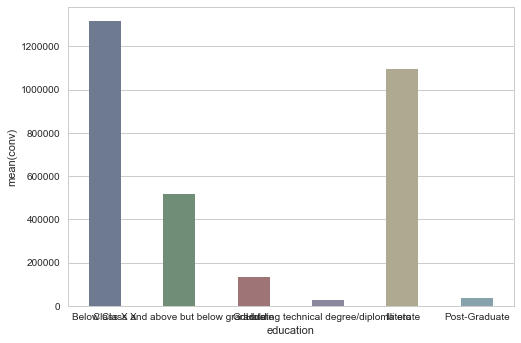

In [20]:
fig, ax = plt.subplots()
sns.set(style="whitegrid", color_codes=True)
data['conv']=data.groupby('education')['under_trial'].transform('sum')
sns.barplot(x='education',y='conv',ax=ax, data=data,saturation=0.35)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .43)
plt.show()

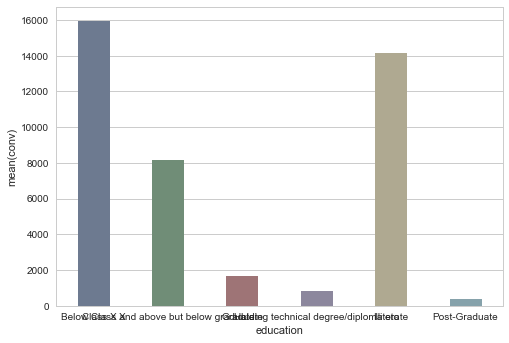

In [22]:
fig, ax = plt.subplots()
sns.set(style="whitegrid", color_codes=True)
data['conv']=data.groupby('education')['detenues'].transform('sum')
sns.barplot(x='education',y='conv',ax=ax, data=data,saturation=0.35)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .43)
plt.show()

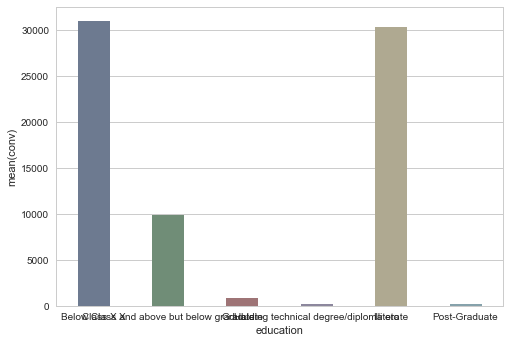

In [23]:
fig, ax = plt.subplots()
sns.set(style="whitegrid", color_codes=True)
data['conv']=data.groupby('education')['others'].transform('sum')
sns.barplot(x='education',y='conv',ax=ax, data=data,saturation=0.35)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .43)
plt.show()

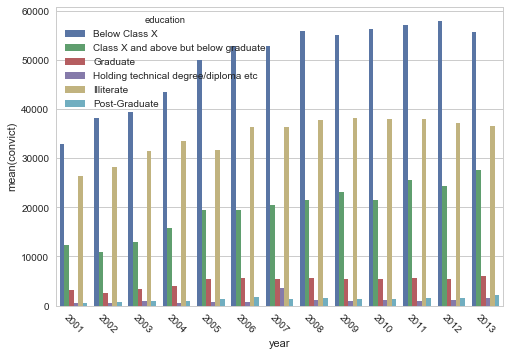

In [32]:
data['convict']=data.groupby(['year','education'])['convicts'].transform('sum')
sns.barplot(x='year',y='convict',hue='education', data=data )
plt.xticks(rotation=-45)
plt.show()

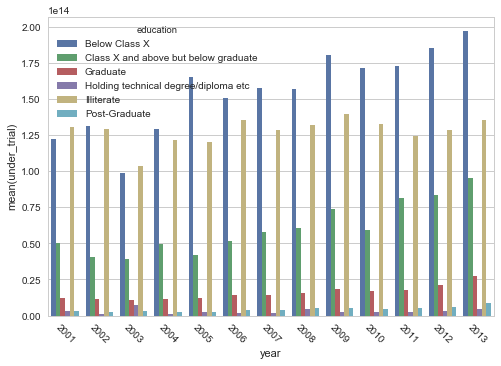

In [36]:
data['under_trial']=data.groupby(['year','education'])['under_trial'].transform('sum')
sns.barplot(x='year',y='under_trial',hue='education', data=data )
plt.xticks(rotation=-45)
plt.show()

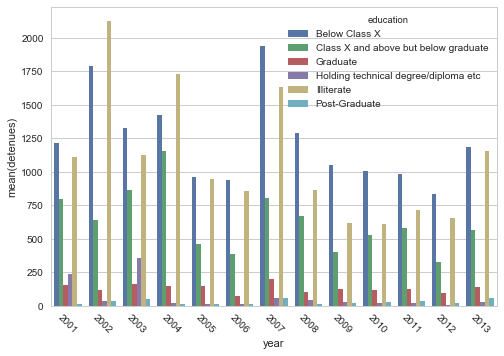

In [34]:
data['detenues']=data.groupby(['year','education'])['detenues'].transform('sum')
sns.barplot(x='year',y='detenues',hue='education', data=data )
plt.xticks(rotation=-45)
plt.show()

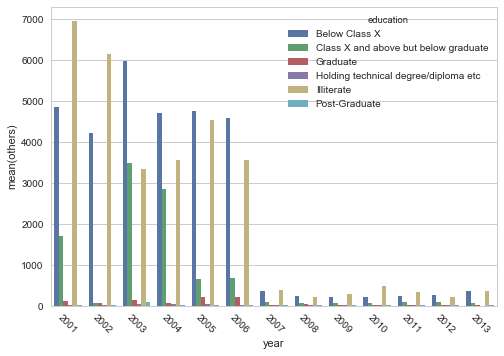

In [35]:
data['others']=data.groupby(['year','education'])['others'].transform('sum')
sns.barplot(x='year',y='others',hue='education', data=data )
plt.xticks(rotation=-45)
plt.show()